<a href="https://colab.research.google.com/github/rushikeshnaik779/EDA/blob/master/TitanicMurderByIce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/MyDrive/Kaggle

/content/gdrive/MyDrive/Kaggle


In [4]:
!kaggle competitions download -c titanic

  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 500kB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 8.02MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 4.00MB/s]


In [5]:
!unzip \*.zip && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [7]:
%ls


gender_submission.csv  kaggle.json  test.csv  train.csv


In [8]:
data = pd.read_csv('./train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

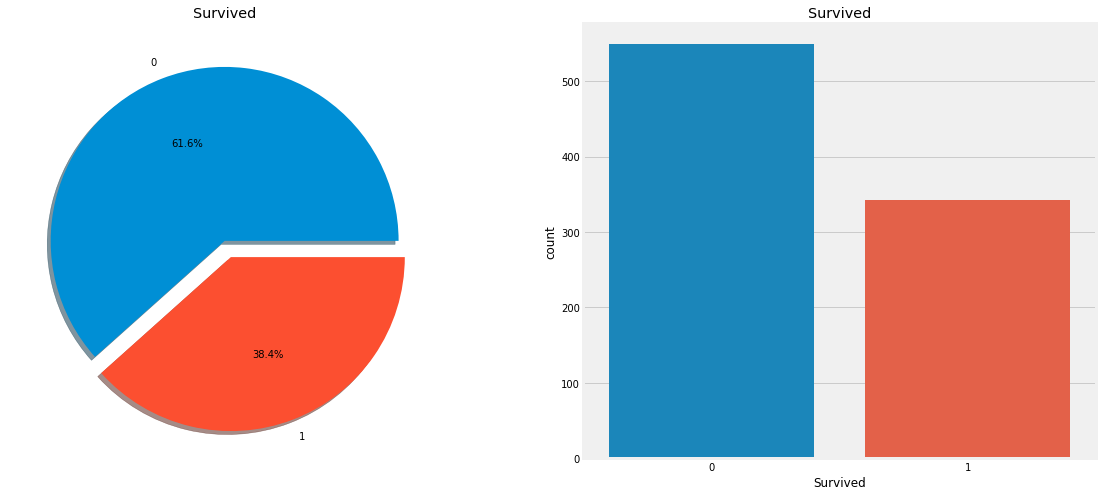

In [12]:
# Question comes how many survived  

f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct = '%1.1f%%',
                                         ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [13]:
# Analysing the features
#SEX ---> CATEGORICAL FEATURE

data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

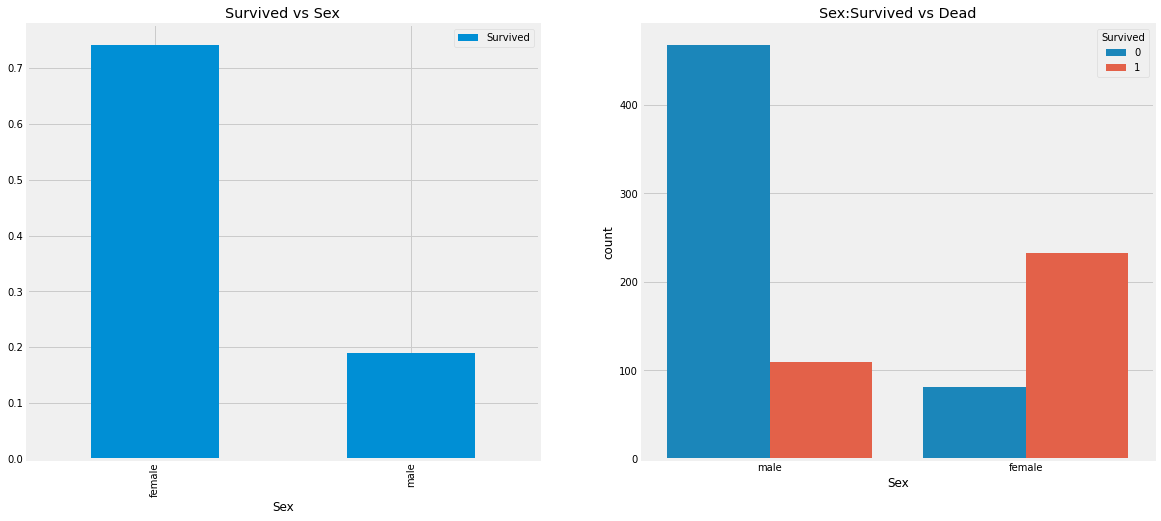

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [16]:
# PCLASS ---> Ordinal feature

pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(
    cmap='summer_r'
)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'Pclass: Survived vs Dead')

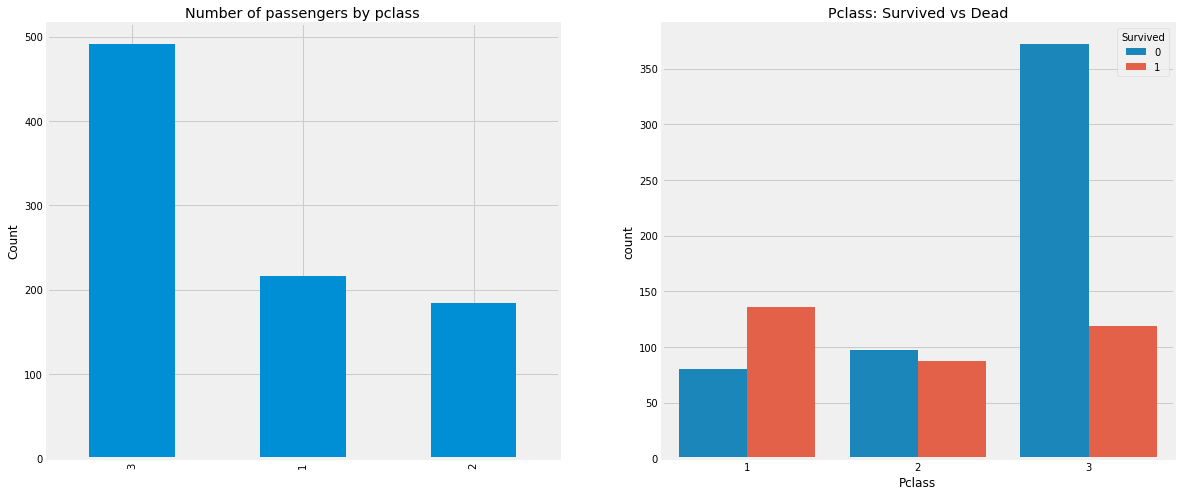

In [18]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of passengers by pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

In [21]:
pd.crosstab([data.Sex, data.Survived], data.Pclass,
            margins=True).style.background_gradient(cmap='summer_r')

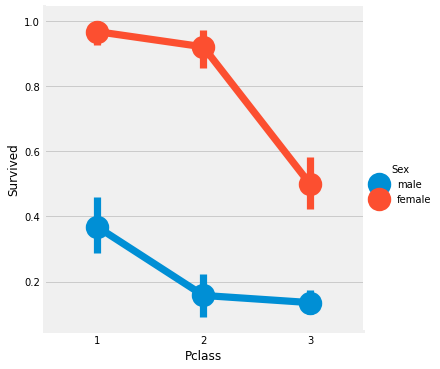

In [22]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

In [26]:
# AGE ---> Continous Feature

print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship was : ',data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship was :  29.69911764705882 Years


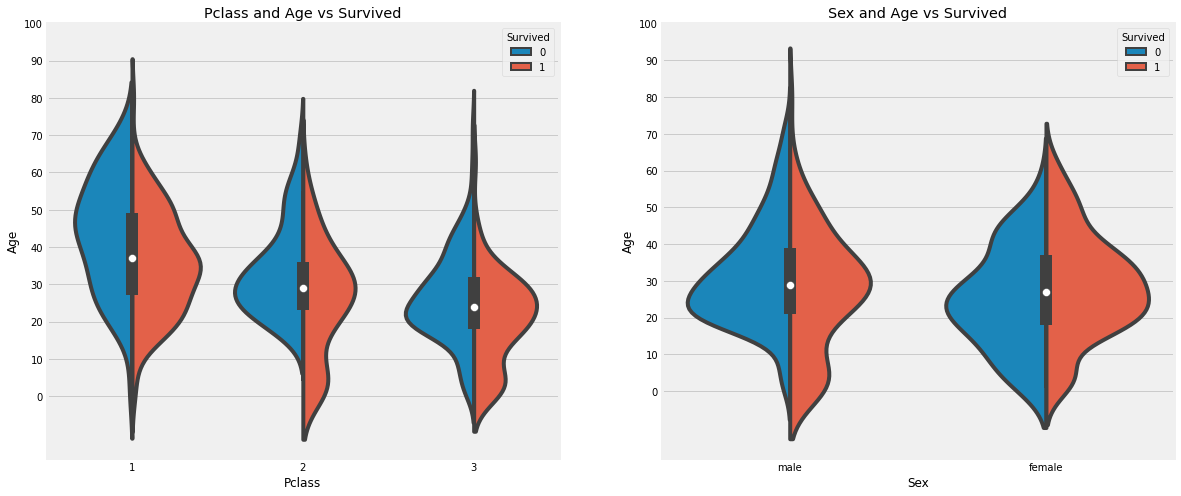

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue="Survived", data=data,
               split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [31]:
data['Initial'] = 0
for i in data:
  data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [33]:
data.Initial.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Capt          1
Sir           1
Mme           1
Jonkheer      1
Don           1
Lady          1
Countess      1
Ms            1
Name: Initial, dtype: int64

In [34]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [35]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady','Countess', 
                         'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],
                        ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 
                         'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True )

In [36]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [38]:
# Fill  NaN Ages 

data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age']= 33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age']=36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age']=5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age']=22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'), 'Age']=46

In [39]:
data.Age.isnull().any()

False

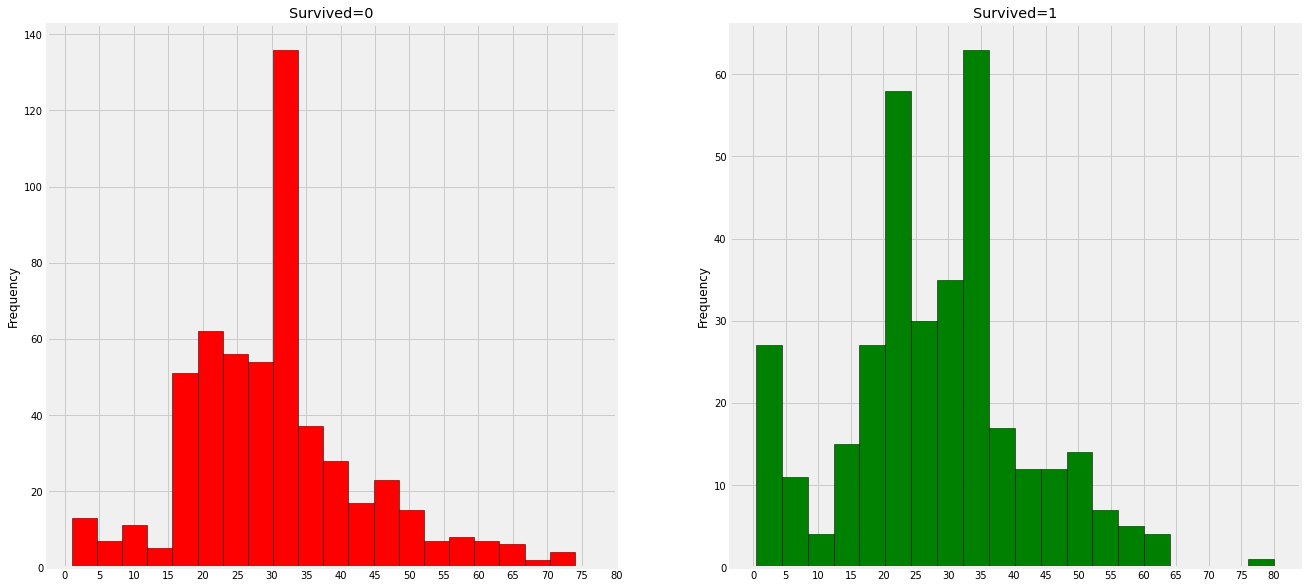

In [42]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, 
                                        edgecolor='black', color='red')
ax[0].set_title('Survived=0')
x1=list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green',
                                        bins=20, edgecolor='black')
ax[1].set_title('Survived=1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()
